In [1]:
from locale import normalize
from unittest.mock import inplace

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/cars.csv')

In [3]:
df.head()


,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [4]:
df.dtypes

Model                 object
MPG                  float64
Cylinders             object
Displacement          object
Horsepower             int64
Weight                object
Acceleration          object
Year                  object
Origin                object
bore                 float64
stroke               float64
compression-ratio     object
dtype: object

In [5]:
df.shape


(394, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              394 non-null    object 
 1   MPG                385 non-null    float64
 2   Cylinders          394 non-null    object 
 3   Displacement       394 non-null    object 
 4   Horsepower         394 non-null    int64  
 5   Weight             394 non-null    object 
 6   Acceleration       394 non-null    object 
 7   Year               394 non-null    object 
 8   Origin             394 non-null    object 
 9   bore               394 non-null    float64
 10  stroke             394 non-null    float64
 11  compression-ratio  394 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 37.1+ KB


In [7]:
df.replace("?", np.nan, inplace=True)

In [8]:
df.isnull().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [9]:
df["MPG"] = df["MPG"].fillna(df["MPG"].mean())


In [10]:
df.isnull().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [13]:
df.drop(columns=["bore", "stroke", "compression-ratio"], inplace=True)

In [14]:
df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,amc rebel sst,16.000000,8,304,150,3433,12,1970,US
4,ford torino,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,chevrolet impala,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,plymouth fury iii,23.551429,8,440,215,4312,8.5,1970,US


In [15]:
df["Year"].str.isnumeric().value_counts()

Year
True     351
False     36
Name: count, dtype: int64

In [16]:
df.loc[df["Year"].str.isnumeric() == False, "Year"]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [17]:
df["Year"] = df["Year"].str.extract(r"^(\d{4})", expand=False)

In [18]:
df["Year"].dtype

dtype('O')

In [19]:
df["Year"] = pd.to_numeric(df["Year"])

In [20]:
df["Year"].dtype

dtype('int64')

In [21]:
df["Age"] = datetime.now().year - df["Year"]

In [22]:
df.drop(["Year"], axis=1, inplace=True)

In [23]:
df.sample(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
170,volkswagen dasher,25.0,4,90,71,2223,16.5,Europe,50
191,ford maverick,24.0,6,200,81,3012,17.6,US,49
388,chevrolet camaro,27.0,4,151,90,2950,17.3,US,43
245,datsun b210 gx,39.4,4,85,70,2070,18.6,Japan,47
166,ford pinto,23.0,4,140,83,2639,17,US,50
192,amc hornet,22.5,6,232,90,3085,17.6,US,49
233,toyota corolla liftback,26.0,4,97,75,2265,18.2,Japan,48
42,ford country squire (sw),13.0,-,400,170,4746,12,US,54
255,amc concord,19.4,6,232,90,3210,17.2,US,47
220,oldsmobile cutlass supreme,17.0,8,260,110,4060,19,US,48


In [24]:
df["Cylinders"]

0      8
3      8
4      8
6      8
7      8
      ..
389    4
390    4
391    4
392    4
393    4
Name: Cylinders, Length: 387, dtype: object

In [25]:
df["Cylinders"].value_counts()

Cylinders
4    196
8     94
6     81
-      9
3      4
5      3
Name: count, dtype: int64

In [26]:

avg = df["Cylinders"].loc[df["Cylinders"].str.isnumeric() == True].astype(int).mean()

In [27]:
df["Cylinders"] = df["Cylinders"].replace("-", avg).astype(int)

In [28]:
df["Displacement"].str.isnumeric().value_counts()

Displacement
True     386
False      1
Name: count, dtype: int64

In [29]:
df.loc[df["Displacement"].str.isnumeric() == False]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
57,dodge colt hardtop,25.0,4,97.5,80,2126,17,US,53


In [30]:
df["Displacement"] = pd.to_numeric(df["Displacement"])

In [31]:
df["Weight"].str.isnumeric().value_counts()

Weight
True    387
Name: count, dtype: int64

In [32]:
df["Weight"] = pd.to_numeric(df["Weight"])

In [33]:
df["Origin"].value_counts()

Origin
US                        228
Japan                      71
Europe                     63
US; Detroit, Michigan       6
Europe-Germany              5
Japan; Aichi                5
US]                         4
Japan; Tokyo                1
Japan; Aichi]               1
US; Detroit, Michigan]      1
Japan; Tokyo]               1
Europe Germany              1
Name: count, dtype: int64

In [34]:
df["Origin"].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [35]:
np.where(df["Origin"].str.contains("US"), "US", df["Origin"])

array(['US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'Japan; Aichi', 'US', 'US', 'US', 'Japan; Aichi', 'Europe-Germany',
       'Europe', 'Europe', 'Europe', 'Europe', 'US', 'US', 'US', 'US',
       'US', 'Japan; Tokyo', 'US', 'Japan; Aichi]', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'Europe', 'Europe', 'Europe', 'Japan; Aichi',
       'Japan; Tokyo]', 'Europe', 'US', 'Japan', 'US', 'Europe', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'Japan',
       'US', 'US', 'US', 'US', 'Europe', 'Europe', 'Europe', 'Europe',
       'US', 'Japan', 'Japan; Aichi', 'US', 'Japan', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'Europe', 'US', 'US', 'US', 'US', 'US', 'Japan; Aichi', 'US',
       'Japan', 'Japan', 'US', 'Europe', 'US', 'US', 'Europe', 'Europe',
       'Europe', 'Europe', 'US', 'Europe', 'Japan', 'US', 'US',

In [36]:
df["Origin"] = np.where(df["Origin"].str.contains("US"), "US", df["Origin"])

In [37]:
df["Origin"].value_counts()

Origin
US                239
Japan              71
Europe             63
Europe-Germany      5
Japan; Aichi        5
Japan; Tokyo        1
Japan; Aichi]       1
Japan; Tokyo]       1
Europe Germany      1
Name: count, dtype: int64

In [38]:
df["Origin"] = np.where(df["Origin"].str.contains("Japan"), "Japan", df["Origin"])
df["Origin"] = np.where(df["Origin"].str.contains("Europe"), "Europe", df["Origin"])

In [39]:
df["Origin"].value_counts()

Origin
US        239
Japan      79
Europe     69
Name: count, dtype: int64

In [40]:
df["Acceleration"].dtype


dtype('O')

In [41]:
df["Acceleration"] = pd.to_numeric(df["Acceleration"])
df.head(19)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,chevrolet chevelle malibu,18.000000,8,307.0,130,3504,12.0,US,55
3,amc rebel sst,16.000000,8,304.0,150,3433,12.0,US,55
4,ford torino,17.000000,8,302.0,140,3449,10.5,US,55
6,chevrolet impala,14.000000,8,454.0,220,4354,9.0,US,55
7,plymouth fury iii,23.551429,8,440.0,215,4312,8.5,US,55
8,pontiac catalina,14.000000,8,455.0,225,4425,8.5,US,55
9,amc ambassador dpl,15.000000,8,390.0,190,3850,8.5,US,55
10,dodge challenger se,15.000000,8,383.0,170,3563,10.0,US,55
11,plymouth 'cuda 340,14.000000,5,340.0,160,3609,8.0,US,55
12,chevrolet monte carlo,23.551429,8,400.0,150,3761,9.5,US,55


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,387.0,23.672514,7.736579,9.0,17.6,23.2,29.00,46.6
Cylinders,387.0,5.410853,1.667795,3.0,4.0,4.0,6.00,8.0
Displacement,387.0,192.184755,103.703706,68.0,102.5,146.0,260.00,455.0
Horsepower,387.0,103.645995,38.128651,46.0,75.0,92.0,121.00,230.0
Weight,387.0,2965.387597,846.332848,1613.0,2221.5,2790.0,3589.50,5140.0
Acceleration,387.0,15.573643,2.746260,8.0,13.9,15.5,17.05,24.8
Age,387.0,48.917313,3.668715,43.0,46.0,49.0,52.00,55.0


In [43]:
df.to_csv("../data/interim/cars.csv", index=False)

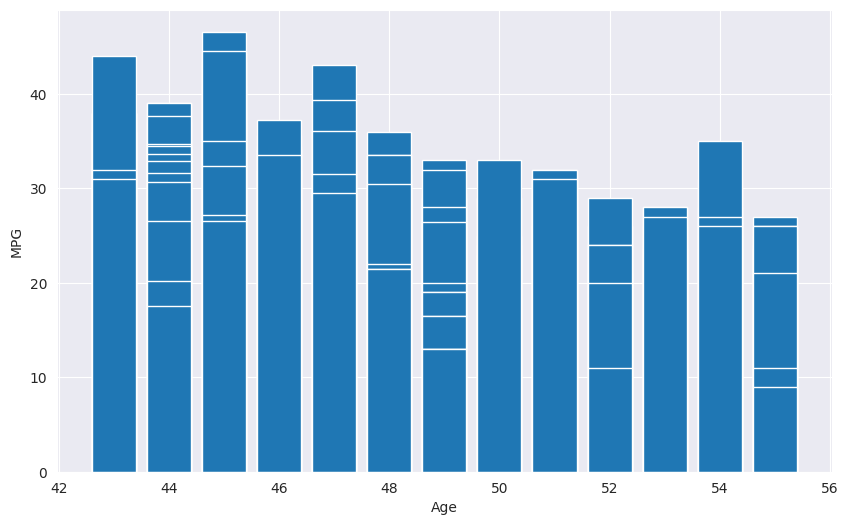

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df["Age"], df["MPG"])

ax.set_xlabel("Age")
ax.set_ylabel("MPG")
plt.show()

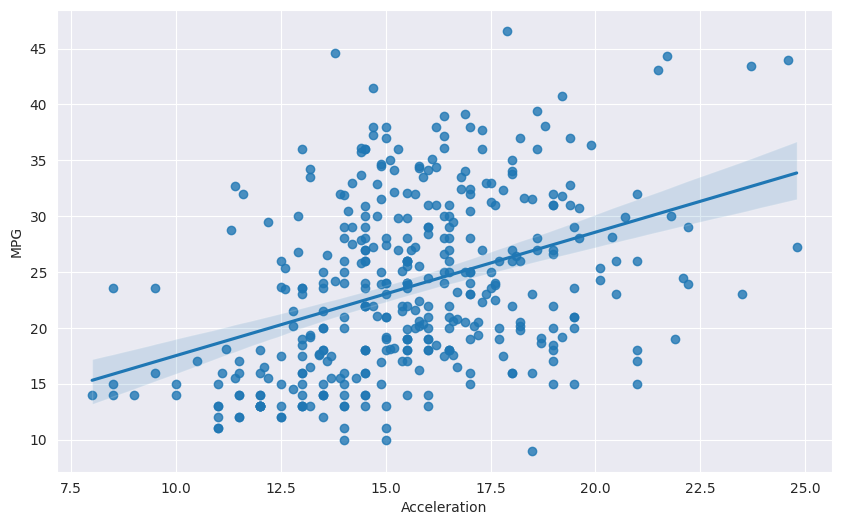

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(df, x="Acceleration", y="MPG", ax=ax)
ax.set_xlabel("Acceleration")
ax.set_ylabel("MPG")
plt.show()

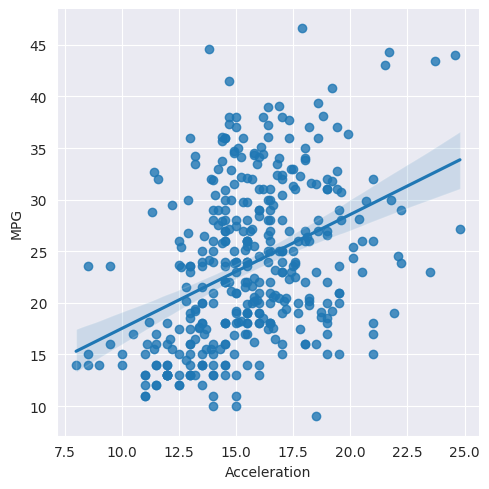

In [46]:

sns.lmplot( df, x="Acceleration", y="MPG")


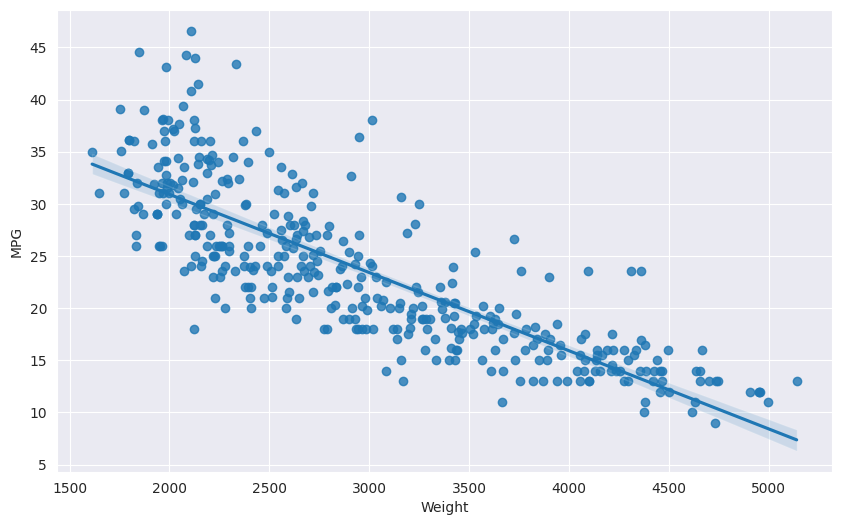

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(df, x="Weight", y="MPG", ax=ax)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

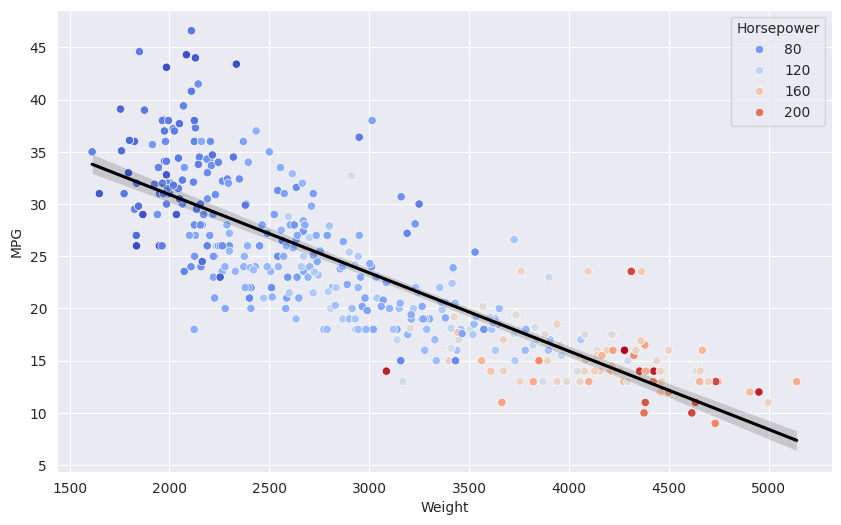

In [48]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(df, x="Weight", y="MPG", hue="Horsepower" ,ax=ax, palette="coolwarm" )
sns.regplot(df, x="Weight", y="MPG", ax=ax, scatter=False, color="black")
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

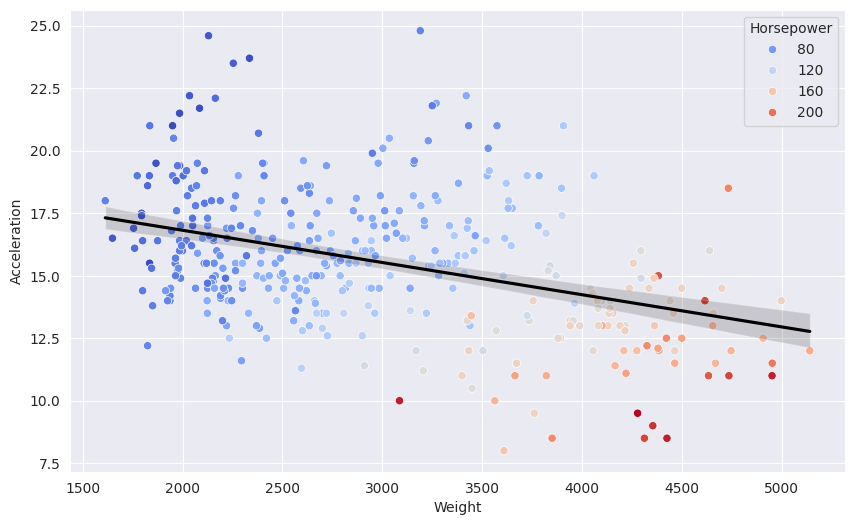

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(df, x="Weight", y="Acceleration", hue="Horsepower" ,ax=ax, palette="coolwarm" )
sns.regplot(df, x="Weight", y="Acceleration", ax=ax, scatter=False, color="black")
ax.set_xlabel("Weight")
ax.set_ylabel("Acceleration")
plt.show()

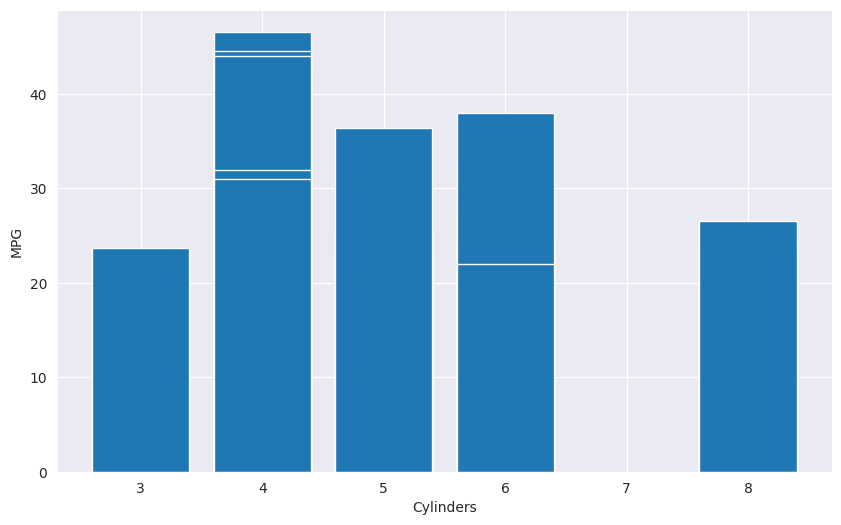

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df["Cylinders"], df["MPG"])

ax.set_xlabel("Cylinders")
ax.set_ylabel("MPG")
plt.show()

In [51]:
df.drop(columns=["Cylinders", "Origin"], inplace=True)

In [52]:
df.head()

,Model,MPG,Displacement,Horsepower,Weight,Acceleration,Age
0,chevrolet chevelle malibu,18.000000,307.0,130,3504,12.0,55
3,amc rebel sst,16.000000,304.0,150,3433,12.0,55
4,ford torino,17.000000,302.0,140,3449,10.5,55
6,chevrolet impala,14.000000,454.0,220,4354,9.0,55
7,plymouth fury iii,23.551429,440.0,215,4312,8.5,55


In [53]:
corr = df.select_dtypes(include=["number"]).corr()

In [54]:
corr


,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


<Axes: >

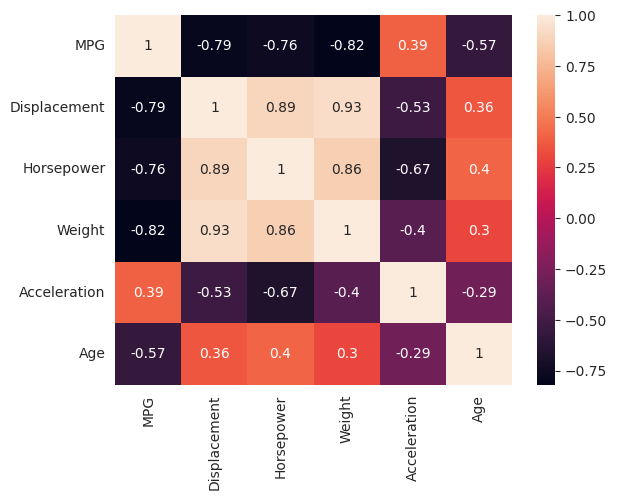

In [55]:
sns.heatmap(corr, annot=True)

AttributeError: 'Axes' object has no attribute 'scatterplot'

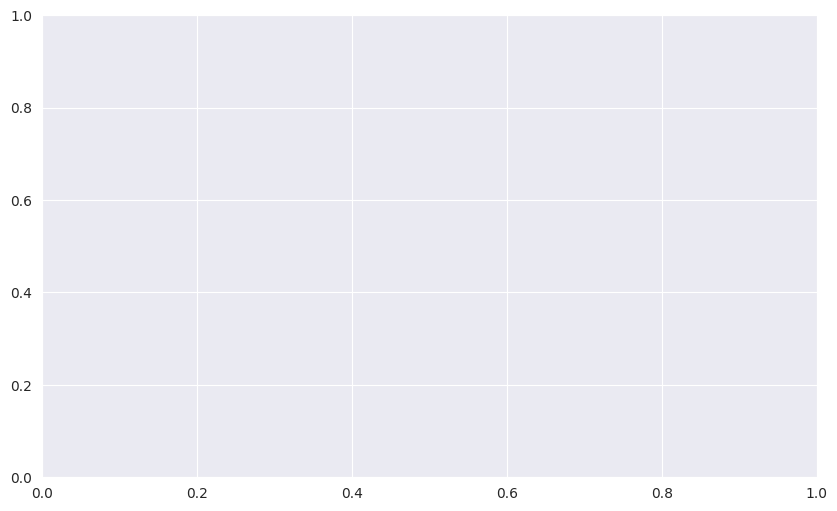

In [56]:
# fig, ax = plt.subplots(figsize=(10, 6))
#
# ax.scatterplot(corr, ax=ax)
# ax.set_xlabel("Acceleration")
# ax.set_ylabel("MPG")
# plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X = df[["Age"]]
y = df["MPG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [61]:
model.score(X_train, y_train)

0.30815836090576965

In [62]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score_ = r2_score(y_test, y_pred)

r2_score # zmierzenie jkaości regresji liniowej (0 nic nie tlumaczy, 1 wszystko gra, poniżej zera gorszy od przewidywania sredniej)


<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

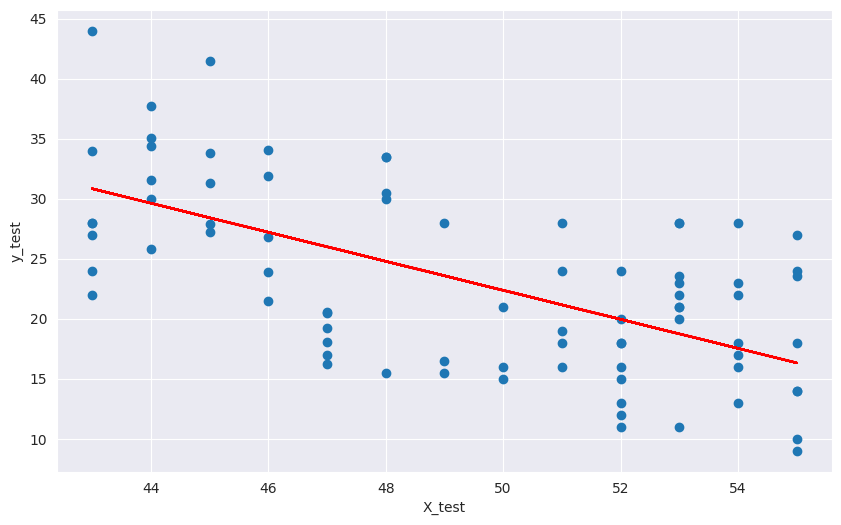

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred, color="red")
ax.set_xlabel("X_test")
ax.set_ylabel("y_test")
plt.show()

In [64]:
X = df[["Horsepower"]]
y = df["MPG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print("training score: ", model.score(X_train, y_train))
y_pred = model.predict(X_test)
r2_score_ = r2_score(y_test, y_pred)

print("r2 score tesBt: ", r2_score_)

training score:  0.5880158855080415
r2 score tesBt:  0.5339040886859203


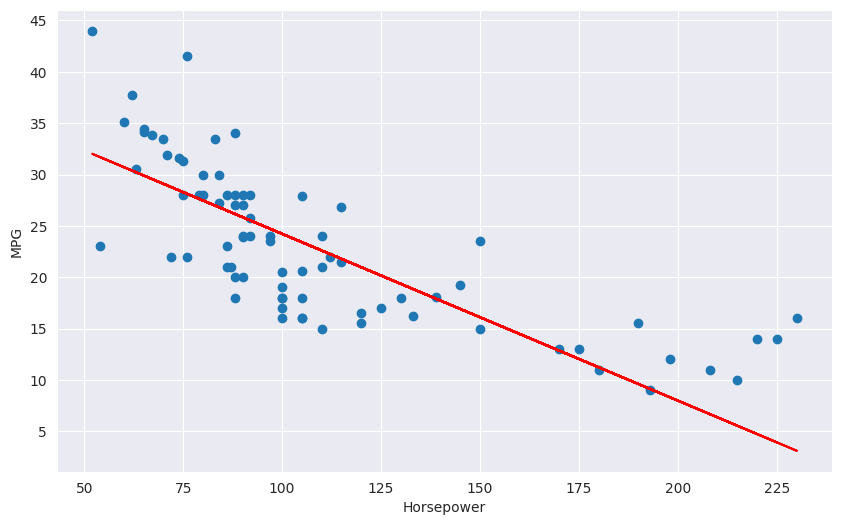

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred, color="red")
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
plt.show()

In [66]:
df

,Model,MPG,Displacement,Horsepower,Weight,Acceleration,Age
0,chevrolet chevelle malibu,18.000000,307.0,130,3504,12.0,55
3,amc rebel sst,16.000000,304.0,150,3433,12.0,55
4,ford torino,17.000000,302.0,140,3449,10.5,55
6,chevrolet impala,14.000000,454.0,220,4354,9.0,55
7,plymouth fury iii,23.551429,440.0,215,4312,8.5,55
...,...,...,...,...,...,...,...
389,ford mustang gl,27.000000,140.0,86,2790,15.6,43
390,vw pickup,44.000000,97.0,52,2130,24.6,43
391,dodge rampage,32.000000,135.0,84,2295,11.6,43
392,ford ranger,28.000000,120.0,79,2625,18.6,43


In [67]:
to_merge =pd.read_csv("../data/interim/cars.csv", )

# df["Origin"] = to_merge["Origin"]

In [68]:
df.head()

,Model,MPG,Displacement,Horsepower,Weight,Acceleration,Age
0,chevrolet chevelle malibu,18.000000,307.0,130,3504,12.0,55
3,amc rebel sst,16.000000,304.0,150,3433,12.0,55
4,ford torino,17.000000,302.0,140,3449,10.5,55
6,chevrolet impala,14.000000,454.0,220,4354,9.0,55
7,plymouth fury iii,23.551429,440.0,215,4312,8.5,55


In [69]:
df.loc[df["Origin"].isna(), ]

KeyError: 'Origin'

In [72]:
to_merge =pd.read_csv("../data/interim/cars.csv")
to_merge.shape

(387, 9)

In [74]:
to_merge["Origin"].isna().sum()
df["Origin"] = to_merge["Origin"]

In [76]:
# one fot encoding
df = pd.get_dummies(df, columns=["Origin"], dtype=np.int8)

In [77]:
X = df.drop(columns=["MPG", "Model"])
y = df["MPG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print("training score: ", model.score(X_train, y_train))
y_pred = model.predict(X_test)
r2_score_ = r2_score(y_test, y_pred)

print("r2 score tesBt: ", r2_score_)

training score:  0.7837569386792334
r2 score tesBt:  0.7947184952846951
